<a href="https://colab.research.google.com/github/LilySaya/MachineLearning/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

20B11806
Saw Kay Khine Oo

(1) PCA from scractch

Cumulative contribution rate:  [[0.72962445]
 [0.95813207]
 [0.99482129]
 [1.        ]]


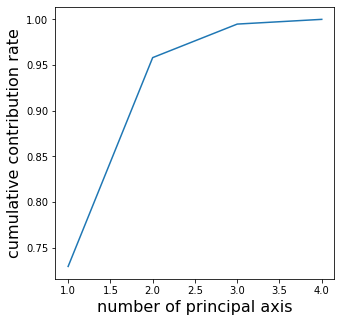

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

#from scratch
class PCA2:

  def __init__(self,n_components):
    self.n_components = n_components
    self.components = None
    self.percentage = None

  def fit(self,X):

      #covariance, function needs samples as columns
      cov = np.cov(X.T)

      #eigenvectors, eigenvalues
      eigenvalues, eigenvectors = np.linalg.eig(cov)


      #transpose eigenvectors to rows, so that it's easy to rearrange using indexes below
      eigenvectors = eigenvectors.T

      #sort eigenvectors
      indexes = np.argsort(eigenvalues)[::-1]
      eigenvalues = eigenvalues[indexes]
      eigenvectors = eigenvectors[indexes]

      #to calculate cumulative contribution rate
      percentage = np.empty([eigenvalues.shape[0],1])
      for i in range(len(percentage)):
        temp = eigenvalues[0:i+1]
        percentage[i] = np.sum(temp)/np.sum(eigenvalues)
      self.percentage = percentage

      self.components = eigenvectors[:self.n_components]

  def transform(self, X):
      return np.dot(X, self.components.T)


data = datasets.load_iris()
x = data.data
sc = StandardScaler()
X = sc.fit_transform(x)
y = data.target

#project the data onto the 2 primary principal components
pca = PCA2(2)
pca.fit(X)

percentage = pca.percentage
dimensions = np.linspace(1,X.shape[1],X.shape[1])
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(dimensions,percentage)
ax.set_xlabel("number of principal axis", fontsize = 16)
ax.set_ylabel("cumulative contribution rate", fontsize = 16)
print("Cumulative contribution rate: ", percentage)

Shape of X: (150, 4)
Shape of transformed X: (150, 2)


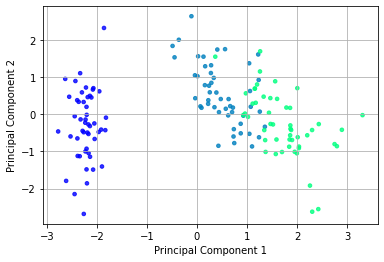

In [130]:
X_projected = pca.transform(X)

print("Shape of X:", X.shape)
print("Shape of transformed X:", X_projected.shape)

x1 = X_projected[:,0]
x2 = X_projected[:,1]

plt.scatter(x1, x2, c=y, alpha = 0.8, s = 13,cmap=plt.cm.get_cmap("winter", np.unique(y).shape[0]))
plt.grid()
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.show()
    

(1) PCA from sklearn

Cumulative contribution rate:  [[0.72962445]
 [0.95813207]
 [0.99482129]
 [1.        ]]


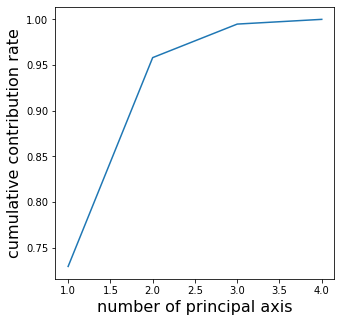

In [135]:
#from sklearn PCA

data = datasets.load_iris()
x = data.data
sc = StandardScaler()
X = sc.fit_transform(x)
y = data.target

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
var_ratio = pca.explained_variance_ratio_
percentage = np.empty([var_ratio.shape[0],1])
temp = 0
for i in range(len(percentage)):
  temp += var_ratio[i]
  percentage[i] = temp

dimensions = np.linspace(1,X.shape[1],X.shape[1])
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(dimensions,percentage)
ax.set_xlabel("number of principal axis", fontsize = 16)
ax.set_ylabel("cumulative contribution rate", fontsize = 16)
print("Cumulative contribution rate: ", percentage)



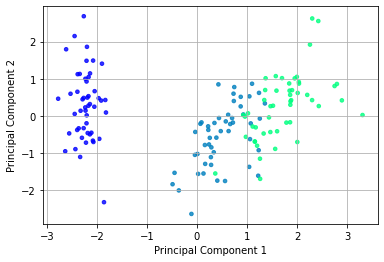

In [136]:
X_projected = pca.transform(X)
x1 = X_projected[:,0]
x2 = X_projected[:,1]

plt.scatter(x1, x2, c=y, alpha = 0.8, s = 13,cmap=plt.cm.get_cmap("winter", np.unique(y).shape[0]))
plt.grid()
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.show()
